In [3]:

# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Читаем данные
df = pd.read_csv('wine.csv')

In [5]:
# Посмотрим на первые строки датасета
print("Первые 5 строк датасета:")
display(df.head())

Первые 5 строк датасета:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
# Разделим признаки и целевую переменную
X = df.drop(['quality', 'type'], axis=1)  # признаки
y = df['quality']  # целевая переменная

In [7]:
# Разделим данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
# Делаем предсказания
y_pred = model.predict(X_test)

In [10]:
# Оцениваем качество модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nСреднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Коэффициент детерминации (R²): {r2:.2f}")


Среднеквадратичная ошибка (MSE): 0.55
Коэффициент детерминации (R²): 0.26


In [11]:
# Визуализация результатов
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Фактические vs Предсказанные значения')

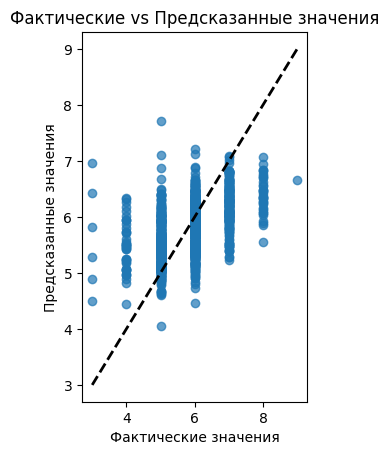

In [12]:
# График фактических vs предсказанных значений
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические vs Предсказанные значения')

Text(0.5, 1.0, 'График остатков')

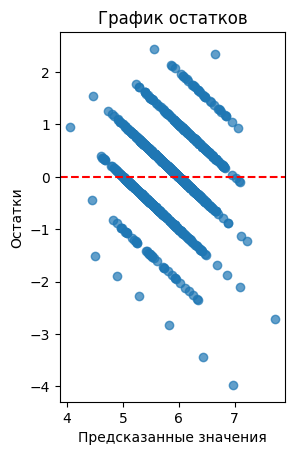

In [13]:
# График остатков
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')

In [14]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [15]:
# Важность признаков (коэффициенты модели)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Коэффициент'])
print("\nКоэффициенты модели:")
display(coefficients)



Коэффициенты модели:


,Коэффициент
fixed acidity,0.078975
volatile acidity,-1.350775
citric acid,-0.143778
residual sugar,0.045949
chlorides,-0.332842
free sulfur dioxide,0.007025
total sulfur dioxide,-0.002663
density,-58.945052
pH,0.482842
sulphates,0.808360


<Figure size 1000x600 with 0 Axes>

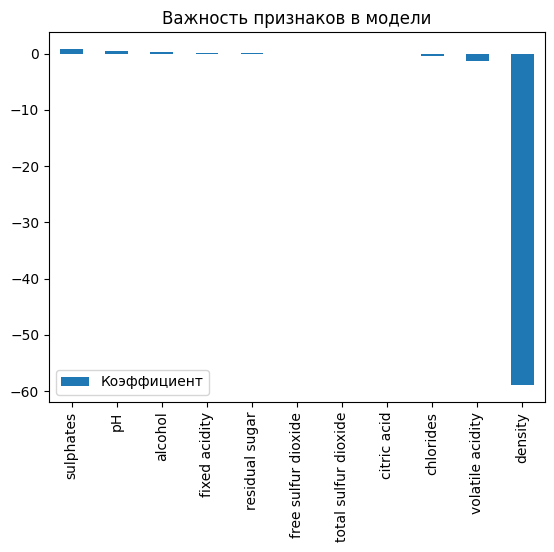

In [16]:
# Визуализация важности признаков
plt.figure(figsize=(10, 6))
coefficients.sort_values(by='Коэффициент', ascending=False).plot(kind='bar')
plt.title('Важность признаков в модели')
plt.show()